In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

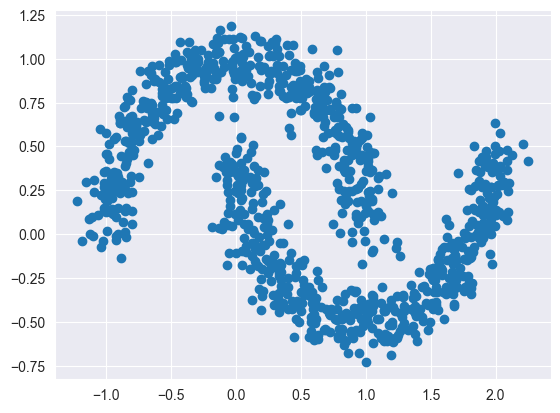

In [3]:
X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [4]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [5]:
min_pts = int(len(X)/200)

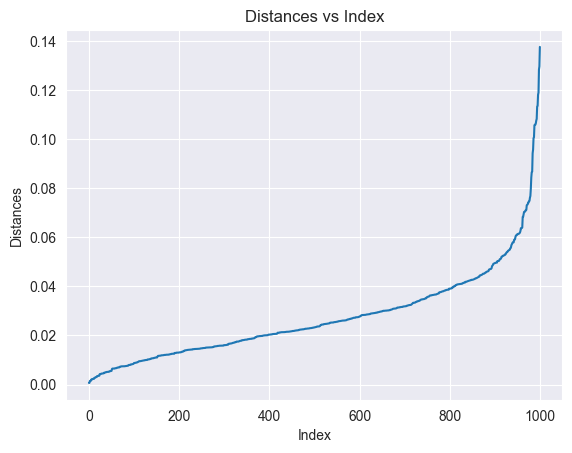

In [44]:
neigh = NearestNeighbors(n_neighbors=min_pts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Index')  # Label for the x-axis
plt.ylabel('Distances')  # Label for the y-axis
plt.title('Distances vs Index')  # Title of the plot
plt.show()

In [7]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

960
0.06402329502301145
***


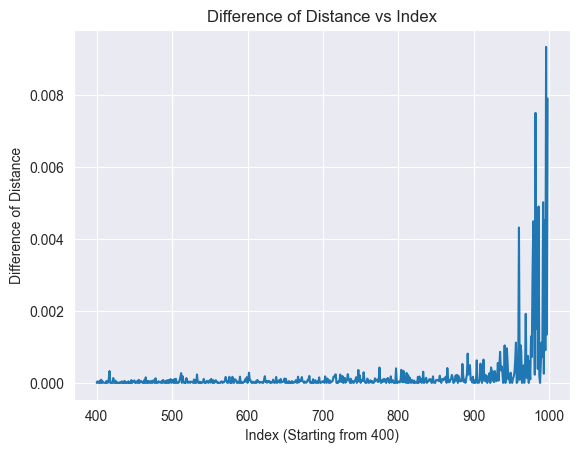

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'diff' and 'diffStd' are defined and you have the data ready
x_values = np.arange(400, len(diff))  # x-values starting from 400
y_values = diff[400:]  # The difference of distances (assuming diff is the correct variable)

plt.plot(x_values, y_values)
plt.xlabel('Index (Starting from 400)')  # Label for the x-axis
plt.ylabel('Difference of Distance')  # Label for the y-axis
plt.title('Difference of Distance vs Index')  # Title of the plot
plt.show()


In [9]:
m = KMeans(n_clusters=2)
m.fit(X)

KMeans(n_clusters=2)

In [10]:
clusters = m.labels_
clusters

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

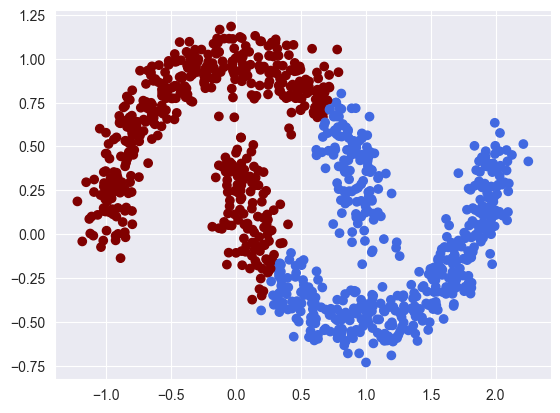

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [12]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value

,0,1,cluster
0,1.492920,-0.502174,0
1,0.776962,0.670965,0
2,0.518506,-0.261795,0
3,-0.484392,0.774598,1
4,0.560755,-0.302359,0
...,...,...,...
995,1.725094,-0.195775,0
996,0.892390,0.488979,0
997,0.189035,1.099805,1
998,1.942872,0.032780,0


In [13]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [14]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [15]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [16]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [17]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)



1
1
0
3
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0


In [18]:
arrays_dens = np.array(result)
arrays_dens

array([[ 1.91907299,  0.11079845,  1.        ],
       [ 0.8147486 , -0.47421556,  1.        ],
       [ 1.94287242,  0.03277965,  0.        ],
       [ 0.80182962, -0.51619409,  3.        ],
       [ 0.89239009,  0.48897935,  0.        ],
       [ 1.72509393, -0.19577539,  0.        ],
       [ 1.88692062, -0.04267889,  0.        ],
       [ 1.52610098, -0.33042908,  0.        ],
       [ 0.76324825,  0.49516177,  0.        ],
       [ 1.80753382,  0.25286742,  0.        ],
       [ 0.89517509, -0.04607662,  0.        ],
       [ 1.1292452 , -0.30085831,  0.        ],
       [-0.92824304,  0.2971074 ,  2.        ],
       [-0.52331829,  0.82941275,  0.        ],
       [-0.35184624,  0.96150405,  0.        ],
       [-0.64774261,  0.66933322,  0.        ],
       [-0.83612818,  0.61191052,  0.        ],
       [ 0.66172934,  0.80827864,  0.        ],
       [ 0.0187195 ,  1.01626947,  0.        ],
       [ 0.27505852,  0.91896012,  0.        ],
       [ 0.23375761, -0.14235577,  0.   

In [19]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[ 0.80182962, -0.51619409,  3.        ]])

In [20]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]

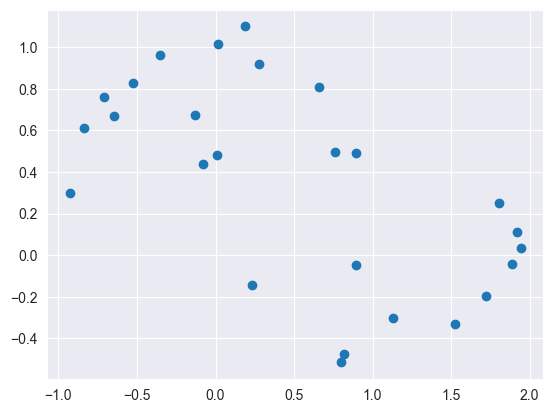

In [21]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

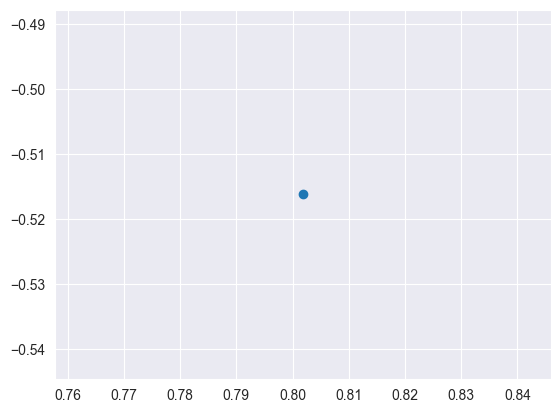

In [22]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [23]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]

In [24]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[ 1.49292004, -0.50217391],
       [ 0.77696206,  0.67096453],
       [ 0.51850635, -0.26179489],
       ...,
       [ 0.55017955, -0.33770532],
       [ 0.09188142,  0.03053102],
       [ 0.57210224, -0.35457247]])

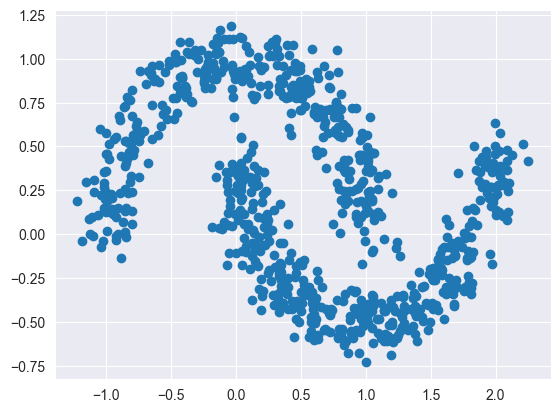

In [25]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [26]:
m = DBSCAN(eps=eps, min_samples=min_pts)
m.fit(remain_values)

DBSCAN(eps=0.06402329502301145)

In [27]:
final_db_cluster = m.labels_
final_db_cluster

array([-1,  0,  1, -1,  1, -1,  2,  1,  1, -1,  1,  3,  6,  0,  1,  6,  3,
       -1,  4,  5,  6, -1,  4,  7, -1,  8,  1,  9,  1, -1,  1,  6, 10,  6,
        4,  6, 11, 12,  1,  1, 11, 13,  6, 11,  1,  1,  6,  3,  1,  2,  1,
        8,  1,  0, 14,  4, 17, 11, -1, 11,  6,  0,  3,  4,  7,  3,  6, 15,
        8,  5,  1, -1,  2,  1, -1,  4, 11,  7, 15,  6,  8,  8,  1, 10, -1,
       12,  6,  1, -1, 16, 17, 18, 11, -1,  1, 10, -1, 18,  8,  2, -1,  1,
        8,  0,  6,  1,  0, -1, 11, 15, -1,  1,  3, 12, 15,  6, 19,  1,  1,
        8, 11, 20,  4,  8,  1,  1, 18,  1,  1, -1, 10,  2, -1, 24,  0, 15,
       -1, -1, -1, -1,  1, 19, 11, -1,  6,  1,  1,  9, 10, -1, -1,  1,  1,
       13, 21,  8, -1, -1,  0,  6, -1,  1,  1, 11,  1, 12,  1, 10, 10, 12,
       -1,  3,  1, 10,  0,  0, 11, -1, 20, 11,  3,  1, -1, -1,  1,  0, 20,
       -1, -1,  1, -1,  8, 16, 11, 11,  1,  3, 18,  6,  1,  0, 15, 21, -1,
       -1,  6,  2,  1, -1, 17,  6,  8,  6,  3,  6, 13,  0, -1,  1,  8,  1,
        1,  8,  4,  6,  6

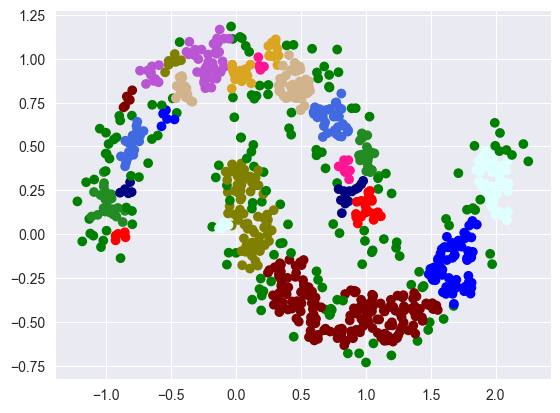

In [28]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [29]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,1.492920,-0.502174,-1
1,0.776962,0.670965,0
2,0.518506,-0.261795,1
3,-0.484392,0.774598,-1
4,0.560755,-0.302359,1
...,...,...,...
823,-0.896052,0.674594,-1
824,0.793781,-0.543455,1
825,0.550180,-0.337705,1
826,0.091881,0.030531,6


In [30]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [31]:
center_point = np.array(center_point)
center_point

array([[ 0.74274351,  0.66171452],
       [ 0.63541633, -0.38990677],
       [-1.03368747,  0.12611923],
       [-0.29081057,  0.97659107],
       [ 0.47611668,  0.84046333],
       [ 0.2020494 ,  0.95510747],
       [ 0.07338078,  0.12205395],
       [ 0.27734315,  1.03021857],
       [ 1.98904115,  0.29868866],
       [ 0.89140556,  0.22639729],
       [ 1.04930266,  0.15402758],
       [ 1.6424515 , -0.17437874],
       [ 0.72828803, -0.44768505],
       [-0.80772407,  0.48584963],
       [-0.81722198,  0.7952519 ],
       [ 0.97315091,  0.47226524],
       [-0.63718512,  0.90438541],
       [-0.42868518,  0.83174349],
       [ 0.8556507 ,  0.38384113],
       [-0.48112425,  0.97857903],
       [ 0.01051837,  0.9209448 ],
       [-0.10883819,  0.0396932 ],
       [-0.8525964 ,  0.25013278],
       [-0.90542296, -0.00629906],
       [-0.53956261,  0.67215686]])

In [32]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([11,  0,  1, 17,  1, 20, 14, 11, 23, 11, 12, 21, 21,  3,  6, 18, 12,
        6,  5, 19,  3, 14, 15,  7,  9,  4,  5, 21, 21,  6,  4,  7,  0, 24,
        8, 12,  9, 12,  0,  0, 16, 12, 21,  9, 21, 21,  4,  6, 11,  1,  1,
       24,  1, 11, 13,  6, 22, 11, 19, 12, 11, 21, 14,  3,  1, 22,  5,  1,
        8, 12, 18, 14,  5, 17,  8,  6, 11, 21, 18,  3,  4,  7, 19, 21, 15,
        8,  7,  1, 10, 23, 12,  0, 12,  4, 11,  7, 22, 15, 21,  8,  8,  1,
        9, 20, 22,  7,  1,  6, 11, 13, 16, 17, 18, 11,  4, 11,  9, 17, 15,
        8, 22,  6,  1,  8,  0, 21, 24, 12, 12,  0,  1, 11, 15,  8, 12,  3,
        1, 15,  6, 16,  1, 12, 12,  8, 11, 20,  5,  8,  8, 12, 24, 12, 18,
        1, 12, 11,  2,  9,  2, 23, 24,  0, 15, 18, 22, 20, 13, 11, 12, 19,
        8,  6,  6, 11, 12, 20,  9,  9, 10,  5, 22,  8,  1,  1, 24, 24,  6,
        8,  8,  6, 18,  6, 22, 12,  8, 21, 11,  1,  1, 12, 10, 10, 17, 16,
       22,  1,  4,  3,  1,  8, 10,  0,  0, 11, 21,  8, 16, 20,  8, 19, 12,
        6,  4, 12,  0, 20

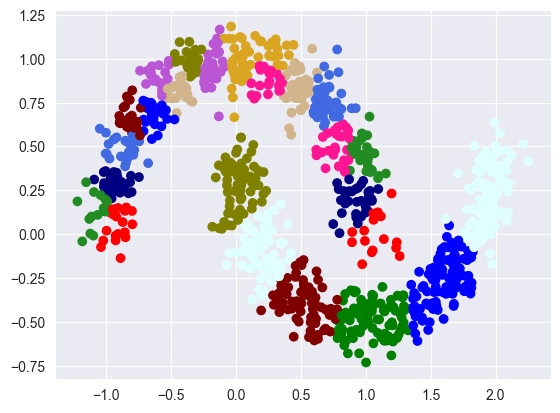

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))